In [ ]:
!pip install altair
!pip install simpy
!pip install pandas
!pip install matplotlib
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Carpenter Jobs**

67
67
67
67
67
Before simulation:
 job_num  burst_time  arrival_time  waiting_time  turn_around_time
       1           7             0             0                 0
       2          13             4             0                 0
       3          11             7             0                 0
       4           4            12             0                 0
       5           9            17             0                 0
       6           8            20             0                 0
       7          12            25             0                 0
       8           7            30             0                 0
       9           8            36             0                 0
      10           8            40             0                 0
      11          11            45             0                 0
      12           7            51             0                 0
      13          11            55             0                 0
      14           7        

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

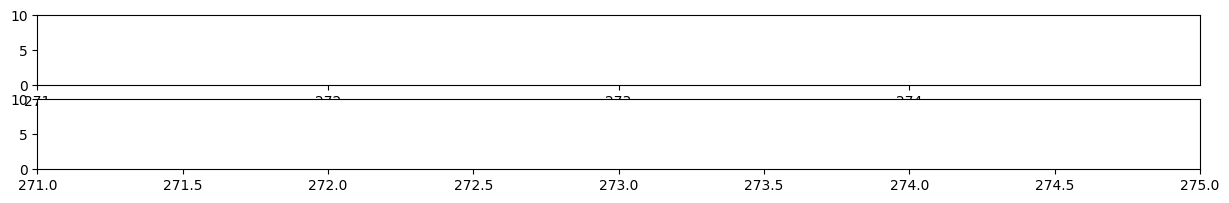

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
    "job_num": list(range(1, 68)),
    "burst_time": [7, 13, 11, 4, 9, 8, 12, 7, 8, 8, 11, 7, 11, 7, 9,
                   13, 9, 8, 8, 8, 9, 8, 13, 9, 10, 9, 9, 8, 6, 11, 2, 7,
                   13, 8, 4, 8, 4, 9, 13, 7, 4, 10, 10, 13, 12, 11, 13, 9,
                   5, 11, 8, 8, 13, 8, 7, 5, 12, 9, 12, 9,
                   11, 9, 12, 7, 3, 13, 10],
    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0] * 67,
    "turn_around_time": [0] * 67
}



arr_chart1 = [0]
arr_chart2 = [0]
sum_burst1 = []
sum_burst2 = []

print(len(job['job_num']))
print(len(job['burst_time']))
print(len(job['arrival_time']))
print(len(job['waiting_time']))
print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
    arr_burst = jobs["burst_time"].to_numpy(copy=True)
    current_time = 0
    shortest1 = -1
    shortest2 = -1
    completed = 0
    min1 = float('inf')
    min2 = float('inf')
    in_job1 = False
    in_job2 = False
    prev_job_num1 = 0
    prev_job_num2 = 0

    while (completed != num):
        for i in range(num):
            if (jobs.iloc[i]["arrival_time"] <= current_time
                    and arr_burst[i] > 0):

                if arr_burst[i] < min1 :
                    print("i" + str(i))
                    if(i != shortest2):
                        shortest1 = i
                        min1 = arr_burst[i]
                        in_job1 = True

                    # if shortest1 == shortest2:
                    #     shortest1 = i+1
                    #     min1 = arr_burst[i+1]
                elif arr_burst[i] < min2:
                    if(i != shortest1):
                        shortest2 = i
                        min2 = arr_burst[i]
                        in_job2 = True


                    # if shortest1 == shortest2:
                    #     shortest2 = i
                    #     min2 = arr_burst[i+1]
        if not in_job1 and not in_job2:
            current_time += 1
            continue
        if min1 == float('inf'):
                        arr_chart1.append(0)
                        print("true1")



        if min2 == float('inf'):
                        arr_chart2.append(0)
                        print("true2")
        if in_job1:
            arr_chart1.append(jobs.iloc[shortest1]["job_num"])
            prev_job_num1 = jobs.iloc[shortest1]["job_num"]
            if arr_burst[shortest1] != 0:
                arr_burst[shortest1] -= 1
            sum_burst1.append(1)
            min1 = arr_burst[shortest1]
            if min1 == 0:
                min1 = float('inf')
                completed += 1
                in_job1 = False
                finish_time = current_time + 1
                jobs.at[shortest1, "waiting_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"] - jobs.iloc[shortest1]["burst_time"]
                if jobs.at[shortest1, "waiting_time"] < 0:
                    jobs.at[shortest1, "waiting_time"] = 0
                jobs.at[shortest1, "turn_around_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"]
                if jobs.at[shortest1, "turn_around_time"] < 0:
                    jobs.at[shortest1, "turn_around_time"] = 0

        if in_job2:
            arr_chart2.append(jobs.iloc[shortest2]["job_num"])
            prev_job_num2 = jobs.iloc[shortest2]["job_num"]
            if arr_burst[shortest2] != 0:
                arr_burst[shortest2] -= 1
            sum_burst2.append(1)
            min2 = arr_burst[shortest2]
            if min2 == 0:
                min2 = float('inf')
                completed += 1
                in_job2 = False
                finish_time = current_time + 1
                jobs.at[shortest2, "waiting_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"] - jobs.iloc[shortest2]["burst_time"]
                if jobs.at[shortest2, "waiting_time"] < 0:
                    jobs.at[shortest2, "waiting_time"] = 0
                jobs.at[shortest2, "turn_around_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"]
                if jobs.at[shortest2, "turn_around_time"] < 0:
                    jobs.at[shortest2, "turn_around_time"] = 0

        current_time += 1

calcWaitTime(67, jobs)
print("After simulation:\n" + jobs.to_string(index=False) + "\n")

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 2))

ylim_min = 0
ylim_max = 10
xlim_min = 271
xlim_max = 274

chart1.set_ylim(ylim_min, ylim_max)
chart2.set_ylim(ylim_min, ylim_max)
sum_burst = jobs["burst_time"].sum()
chart1.set_xlim(xlim_min, xlim_max)
chart2.set_xlim(xlim_min, xlim_max)

dates = pd.date_range(start="2023-01-08", end="2023-10-08", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
print(len(dates))

chart1.set_xticks(range(xlim_min, xlim_max))
chart1.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart2.set_xticks(range(xlim_min, xlim_max))
chart2.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart1.set_ylabel("Server 1")
chart2.set_ylabel("Server 2")
chart1.set_xlabel("Runtime in days")
chart2.set_xlabel("Runtime in days")
chart1.set_yticks([])
chart2.set_yticks([])
chart1.grid(True)
chart2.grid(True)

plt.subplots_adjust(hspace=3, top=1.2, bottom=0.1, left=0.1, right=0.9)

print(arr_chart2)

j = xlim_min
for i in arr_chart1[xlim_min:xlim_max]:
    if i % 10 == 1 :
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))
    chart1.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

j = xlim_min
for i in arr_chart2[xlim_min:xlim_max]:
    if i % 10 == 1:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))

    chart2.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

plt.tight_layout()
plt.show()

util_rate1 = len(sum_burst1) / len(arr_chart1)
util_rate2 = len(sum_burst2) / len(arr_chart2)

print("Utilization Rate of server 1: ", util_rate1)
print("Utilization Rate of server 2: ", util_rate2)

print("Average Turn Around Time: ", jobs["turn_around_time"].mean())


**Painter Jobs**

67
67
67
67
67
Before simulation:
 job_num  burst_time  arrival_time  waiting_time  turn_around_time
       1           4             0             0                 0
       2           3             4             0                 0
       3           6             7             0                 0
       4           6            12             0                 0
       5           2            17             0                 0
       6           7            20             0                 0
       7           5            25             0                 0
       8           7            30             0                 0
       9           7            36             0                 0
      10           5            40             0                 0
      11           2            45             0                 0
      12           3            51             0                 0
      13           3            55             0                 0
      14           2        

<ipython-input-37-8d558bf457f5>:220: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


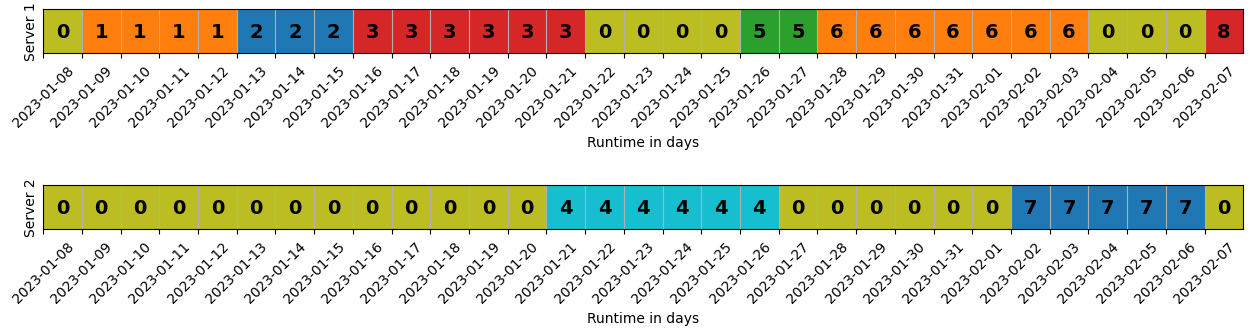

Utilization Rate of server 1:  0.8583333333333333
Utilization Rate of server 2:  0.3625
Average Turn Around Time:  4.447761194029851


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
    "job_num": list(range(1, 68)),
    "burst_time": [4, 3, 6, 6, 2, 7, 5, 7, 7, 5, 2, 3, 3, 2, 5, 6, 6, 6, 2, 4,
        7, 5, 5, 3, 5, 4, 3, 7, 3, 4, 2, 7, 2, 5, 5, 6, 4, 2, 6, 4,
        5, 2, 2, 5, 2, 3, 6, 7, 5, 2, 5, 2, 5, 4, 6, 5, 4, 5, 7, 4,
        5, 2, 3, 3, 2, 6, 6],
    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0] * 67,
    "turn_around_time": [0] * 67
}



arr_chart1 = [0]
arr_chart2 = [0]
sum_burst1 = []
sum_burst2 = []

print(len(job['job_num']))
print(len(job['burst_time']))
print(len(job['arrival_time']))
print(len(job['waiting_time']))
print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
    arr_burst = jobs["burst_time"].to_numpy(copy=True)
    current_time = 0
    shortest1 = -1
    shortest2 = -1
    completed = 0
    min1 = float('inf')
    min2 = float('inf')
    in_job1 = False
    in_job2 = False
    prev_job_num1 = 0
    prev_job_num2 = 0

    while (completed != num):
        for i in range(num):
            if (jobs.iloc[i]["arrival_time"] <= current_time
                    and arr_burst[i] > 0):

                if arr_burst[i] < min1 :
                    print("i" + str(i))
                    if(i != shortest2):
                        shortest1 = i
                        min1 = arr_burst[i]
                        in_job1 = True

                    # if shortest1 == shortest2:
                    #     shortest1 = i+1
                    #     min1 = arr_burst[i+1]
                elif arr_burst[i] < min2:
                    if(i != shortest1):
                        shortest2 = i
                        min2 = arr_burst[i]
                        in_job2 = True


                    # if shortest1 == shortest2:
                    #     shortest2 = i
                    #     min2 = arr_burst[i+1]
        if not in_job1 and not in_job2:
            current_time += 1
            continue
        if min1 == float('inf'):
                        arr_chart1.append(0)
                        print("true1")



        if min2 == float('inf'):
                        arr_chart2.append(0)
                        print("true2")
        if in_job1:
            arr_chart1.append(jobs.iloc[shortest1]["job_num"])
            prev_job_num1 = jobs.iloc[shortest1]["job_num"]
            if arr_burst[shortest1] != 0:
                arr_burst[shortest1] -= 1
            sum_burst1.append(1)
            min1 = arr_burst[shortest1]
            if min1 == 0:
                min1 = float('inf')
                completed += 1
                in_job1 = False
                finish_time = current_time + 1
                jobs.at[shortest1, "waiting_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"] - jobs.iloc[shortest1]["burst_time"]
                if jobs.at[shortest1, "waiting_time"] < 0:
                    jobs.at[shortest1, "waiting_time"] = 0
                jobs.at[shortest1, "turn_around_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"]
                if jobs.at[shortest1, "turn_around_time"] < 0:
                    jobs.at[shortest1, "turn_around_time"] = 0

        if in_job2:
            arr_chart2.append(jobs.iloc[shortest2]["job_num"])
            prev_job_num2 = jobs.iloc[shortest2]["job_num"]
            if arr_burst[shortest2] != 0:
                arr_burst[shortest2] -= 1
            sum_burst2.append(1)
            min2 = arr_burst[shortest2]
            if min2 == 0:
                min2 = float('inf')
                completed += 1
                in_job2 = False
                finish_time = current_time + 1
                jobs.at[shortest2, "waiting_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"] - jobs.iloc[shortest2]["burst_time"]
                if jobs.at[shortest2, "waiting_time"] < 0:
                    jobs.at[shortest2, "waiting_time"] = 0
                jobs.at[shortest2, "turn_around_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"]
                if jobs.at[shortest2, "turn_around_time"] < 0:
                    jobs.at[shortest2, "turn_around_time"] = 0

        current_time += 1

calcWaitTime(67, jobs)
print("After simulation:\n" + jobs.to_string(index=False) + "\n")

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 2))

ylim_min = 0
ylim_max = 10
xlim_min = 0
xlim_max = 31

chart1.set_ylim(ylim_min, ylim_max)
chart2.set_ylim(ylim_min, ylim_max)
sum_burst = jobs["burst_time"].sum()
chart1.set_xlim(xlim_min, xlim_max)
chart2.set_xlim(xlim_min, xlim_max)

dates = pd.date_range(start="2023-01-08", end="2023-10-08", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
print(len(dates))

chart1.set_xticks(range(xlim_min, xlim_max))
chart1.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart2.set_xticks(range(xlim_min, xlim_max))
chart2.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart1.set_ylabel("Server 1")
chart2.set_ylabel("Server 2")
chart1.set_xlabel("Runtime in days")
chart2.set_xlabel("Runtime in days")
chart1.set_yticks([])
chart2.set_yticks([])
chart1.grid(True)
chart2.grid(True)

plt.subplots_adjust(hspace=3, top=1.2, bottom=0.1, left=0.1, right=0.9)

print(arr_chart2)

j = xlim_min
for i in arr_chart1[xlim_min:xlim_max]:
    if i % 10 == 1 :
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))
    chart1.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

j = xlim_min
for i in arr_chart2[xlim_min:xlim_max]:
    if i % 10 == 1:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))

    chart2.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

plt.tight_layout()
plt.show()

util_rate1 = len(sum_burst1) / len(arr_chart1)
util_rate2 = len(sum_burst2) / len(arr_chart2)

print("Utilization Rate of server 1: ", util_rate1)
print("Utilization Rate of server 2: ", util_rate2)

print("Average Turn Around Time: ", jobs["turn_around_time"].mean())

**Upholster Jobs**

67
67
67
67
67
Before simulation:
 job_num  burst_time  arrival_time  waiting_time  turn_around_time
       1           7             0             0                 0
       2          11             4             0                 0
       3           8             7             0                 0
       4           7            12             0                 0
       5           9            17             0                 0
       6           9            20             0                 0
       7           9            25             0                 0
       8           7            30             0                 0
       9           9            36             0                 0
      10           9            40             0                 0
      11           6            45             0                 0
      12          10            51             0                 0
      13          11            55             0                 0
      14          10        

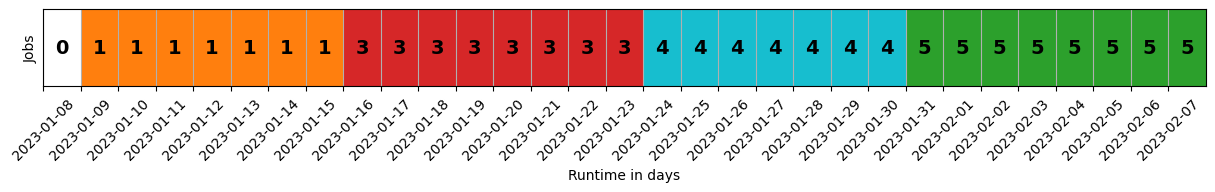

Utilization Rate of server 1:  0.9962121212121212
Average Turn Around Time:  27.895522388059703


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
    "job_num": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,61,62,63,64,65,66,67]
,
    "burst_time": [7, 11, 8, 7, 9, 9, 9, 7, 9, 9, 6, 10, 11, 10, 9, 7, 6, 11, 11, 11,
    10, 10, 8, 7, 10, 6, 10, 6, 9, 10, 9, 9, 8, 8, 11, 8, 6, 11, 9, 6,
    6, 11, 8, 11, 9, 9, 7, 11, 8, 8, 11, 7, 11, 10, 8, 8, 9, 11, 6, 9,
    10, 10, 8, 7, 7, 6, 11],

    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
,
    "turn_around_time": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

}

arr_chart = [0]
sum_burst = []

#arr_rand = np.random.randint(1, 11, 5)
#job['arrival_time'] = arr_rand.copy()
print(len(job['job_num']))
print(len(job['burst_time']))
print(len(job['arrival_time']))
print(len(job['waiting_time']))
print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
  arr_burst = jobs["burst_time"].to_numpy(copy=True)
  current_time = 0
  shortest = 0
  completed = 0
  min = 99999
  in_job = False
  prev_job_num = 0

  while (completed != num):
    for i in range(num):
      if((jobs.iloc[i]["arrival_time"] <= current_time)
          and (arr_burst[i] > 0) and (arr_burst[i] < min)):
        shortest = i
        min = arr_burst[i]
        #print(min)
        in_job = True

    if (in_job == False):
      current_time += 1
      # print(str(current_time) + ": No job ")
      continue

    # if (prev_job_num != 0 and prev_job_num != jobs.iloc[shortest]["job_num"]):
    #   print("\n" + str(current_time) + ": job "+ str(jobs.iloc[shortest]["job_num"]) + " with " + str(min) + " burst time is now the shortest")
    # print(str(current_time) + ": job " + str(jobs.iloc[shortest]["job_num"]) + " is now being served")
    arr_chart.append(jobs.iloc[shortest]["job_num"])
    prev_job_num = jobs.iloc[shortest]["job_num"]

    arr_burst[shortest] -= 1

    sum_burst.append(1)
    min = arr_burst[shortest]
    if(min == 0):
      min = 99999

    if(arr_burst[shortest] == 0):
      completed += 1
      in_job = False
      finish_time = current_time + 1
      jobs.iloc[shortest]["waiting_time"] = finish_time - jobs.iloc[shortest]["arrival_time"] - jobs.iloc[shortest]["burst_time"]
      if(jobs.iloc[shortest]["waiting_time"] < 0):
        jobs.iloc[shortest]["waiting_time"] = 0
      jobs.iloc[shortest]["turn_around_time"] = finish_time - jobs.iloc[shortest]["arrival_time"]
      if(jobs.iloc[shortest]["turn_around_time"] < 0):
        jobs.iloc[shortest]["turn_around_time"] = 0

    current_time += 1

calcWaitTime(30, jobs)
print("After simulation:\n" + jobs.to_string(index=False) + "\n")

dates = pd.date_range(start="2023-01-08", end="2023-10-08", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
print(len(dates))

fig, chart = plt.subplots(figsize=(15,1))

ylim_min = 0
ylim_max = 10
xlim_min = 0
xlim_max = 31

chart.set_ylim(ylim_min, ylim_max)
# sum_burst = jobs["burst_time"].sum()
chart.set_xlim(xlim_min, xlim_max)
chart.set_xticks(range(xlim_min, xlim_max))
chart.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart.set_ylabel("Jobs")
chart.set_xlabel("Runtime in days")
chart.set_yticks([])
chart.grid(True)

j = 0
for i in arr_chart[xlim_min:xlim_max]:
  if(i % 10 == 1):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
  elif(i % 10 == 2):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
  elif(i % 10 == 3):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
  elif(i % 10 == 4):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
  elif(i % 10 == 5):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
  elif(i % 10 == 6):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
  elif(i % 10 == 7):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
  elif(i % 10 == 8):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
  elif(i % 10 == 9):
    chart.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
  chart.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
  j += 1
plt.show()

util_rate = len(sum_burst) / len(arr_chart)

print("Utilization Rate of server 1: ", util_rate)

print("Average Turn Around Time: ", jobs["turn_around_time"].mean())